# **import libraries**

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.reset_option('display.max_columns')

In [30]:
dataset = pd.read_csv("heart_disease_uci.csv")
dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [31]:
dataset.shape

(920, 16)

In [32]:
dataset.isnull().sum().sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# **prepare features and lable**

In [34]:
dataset = dataset.drop(columns=['id'])

In [35]:
dataset.drop(columns=['dataset'],inplace=True)

In [36]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [37]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
915,1
916,0
917,2
918,0


In [39]:
X['fbs'] = X['fbs'].map({False:0,True:1})
X['exang'] = X['exang'].map({False:0,True:1})

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
880,62,Male,asymptomatic,NaN,170.0,0.0,st-t abnormality,120.0,1.0,3.0,NaN,NaN,NaN
457,54,Male,non-anginal,150.0,NaN,0.0,normal,122.0,0.0,0.0,NaN,NaN,NaN
797,51,Male,non-anginal,NaN,339.0,0.0,normal,NaN,NaN,NaN,NaN,NaN,NaN
25,50,Female,non-anginal,120.0,219.0,0.0,normal,158.0,0.0,1.6,flat,0.0,normal
84,52,Male,atypical angina,120.0,325.0,0.0,normal,172.0,0.0,0.2,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.0,177.0,0.0,normal,162.0,1.0,0.0,upsloping,1.0,reversable defect
270,61,Male,asymptomatic,140.0,207.0,0.0,lv hypertrophy,138.0,1.0,1.9,upsloping,1.0,reversable defect
860,75,Male,asymptomatic,160.0,310.0,1.0,normal,112.0,1.0,2.0,downsloping,NaN,reversable defect
435,53,Female,atypical angina,140.0,216.0,0.0,normal,142.0,1.0,2.0,flat,NaN,NaN


In [42]:
y_train

,num
880,4
457,0
797,3
25,0
84,0
...,...
106,2
270,1
860,0
435,0


In [43]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
319,36,Male,atypical angina,120.0,166.0,0.0,normal,180.0,0.0,0.0,NaN,NaN,NaN
377,45,Male,atypical angina,140.0,224.0,1.0,normal,122.0,0.0,0.0,NaN,NaN,NaN
538,48,Male,asymptomatic,160.0,329.0,0.0,normal,92.0,1.0,1.5,flat,NaN,NaN
296,59,Male,asymptomatic,164.0,176.0,1.0,lv hypertrophy,90.0,0.0,1.0,flat,2.0,fixed defect
531,40,Female,asymptomatic,150.0,392.0,0.0,normal,130.0,0.0,2.0,flat,NaN,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,46,Male,atypical angina,140.0,275.0,0.0,normal,165.0,1.0,0.0,NaN,NaN,NaN
97,60,Female,asymptomatic,150.0,258.0,0.0,lv hypertrophy,157.0,0.0,2.6,flat,2.0,reversable defect
906,61,Male,non-anginal,120.0,337.0,0.0,normal,98.0,1.0,0.0,NaN,NaN,NaN
467,55,Male,asymptomatic,120.0,270.0,0.0,normal,140.0,0.0,0.0,NaN,NaN,NaN


In [44]:
y_test

,num
319,0
377,0
538,1
296,3
531,1
...,...
382,0
97,3
906,3
467,0


# **handling missing values**

In [45]:
dataset.dropna(subset=['restecg','chol'],inplace=True)

In [46]:
dataset.select_dtypes(include=[np.int64,np.float64]).isnull().sum().sort_values(ascending = False)

,0
ca,580
oldpeak,59
trestbps,56
thalch,52
age,0
chol,0
num,0


In [47]:
dataset.select_dtypes(include=['object']).isnull().sum().sort_values(ascending = False)

,0
thal,456
slope,286
fbs,89
exang,52
sex,0
cp,0
restecg,0


In [48]:
from sklearn.impute import SimpleImputer
cols_to_impute = ['ca', 'oldpeak', 'trestbps','thalch']
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

In [49]:
obcols_to_impute = ['thal','slope','fbs','exang']
object_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X_train[obcols_to_impute] = object_imputer.fit_transform(X_train[obcols_to_impute])
X_test[obcols_to_impute] = object_imputer.transform(X_test[obcols_to_impute])

In [50]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
X_train[['slope','restecg']] = ordinalEncoder.fit_transform(X_train[['slope','restecg']])
X_test[['slope','restecg']] = ordinalEncoder.transform(X_test[['slope','restecg']])

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['thal','sex','cp']),('scale',StandardScaler(),['age','trestbps','chol','thalch','oldpeak'])],remainder='passthrough')
X_train_new = ct.fit_transform(X_train)
X_test_new = ct.transform(X_test)


In [52]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
880,62,Male,asymptomatic,131.668596,170.0,0.0,2.0,120.000000,1.0,3.000000,1.0,0.688,normal
457,54,Male,non-anginal,150.000000,NaN,0.0,1.0,122.000000,0.0,0.000000,1.0,0.688,normal
797,51,Male,non-anginal,131.668596,339.0,0.0,1.0,137.383285,0.0,0.881187,1.0,0.688,normal
25,50,Female,non-anginal,120.000000,219.0,0.0,1.0,158.000000,0.0,1.600000,1.0,0.000,normal
84,52,Male,atypical angina,120.000000,325.0,0.0,1.0,172.000000,0.0,0.200000,2.0,0.000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.000000,177.0,0.0,1.0,162.000000,1.0,0.000000,2.0,1.000,reversable defect
270,61,Male,asymptomatic,140.000000,207.0,0.0,0.0,138.000000,1.0,1.900000,2.0,1.000,reversable defect
860,75,Male,asymptomatic,160.000000,310.0,1.0,1.0,112.000000,1.0,2.000000,0.0,0.688,reversable defect
435,53,Female,atypical angina,140.000000,216.0,0.0,1.0,142.000000,1.0,2.000000,1.0,0.688,normal


In [53]:
X_train_new[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.9024125467171098,
       0.0, -0.25056797672816766, -0.688473318787247, 1.9690969387230661,
       0.0, 2.0, 1.0, 1.0, 0.688], dtype=object)

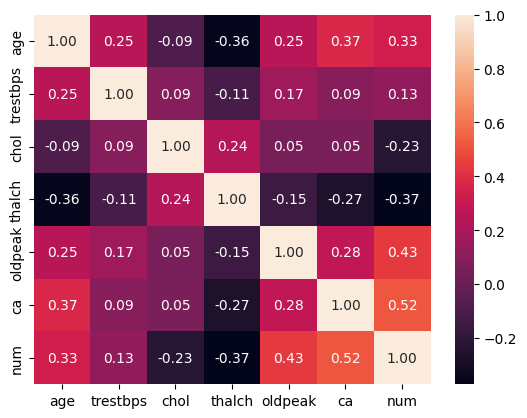

In [54]:
sns.heatmap(data=dataset.select_dtypes(include=[int,float]).corr(),annot=True,fmt='.2f')
plt.show()

In [55]:
dataset.select_dtypes(include=[int,float]).corr()

,age,trestbps,chol,thalch,oldpeak,ca,num
age,1.000000,0.251953,-0.091028,-0.360117,0.251845,0.372018,0.330563
trestbps,0.251953,1.000000,0.090750,-0.113488,0.170497,0.094925,0.128715
chol,-0.091028,0.090750,1.000000,0.238166,0.047337,0.051606,-0.232076
thalch,-0.360117,-0.113488,0.238166,1.000000,-0.151386,-0.265275,-0.371808
oldpeak,0.251845,0.170497,0.047337,-0.151386,1.000000,0.280301,0.434607
ca,0.372018,0.094925,0.051606,-0.265275,0.280301,1.000000,0.515338
num,0.330563,0.128715,-0.232076,-0.371808,0.434607,0.515338,1.000000
